## Outliers:-They are datapoints which are far away or different from the other datapoints
## in the dataset.Outliers are extreme values that deviate from other observations on data , they may indicate a variability in a measurement, experimental errors or a novelty

![image.png](attachment:image.png)

![image.png](attachment:image.png)

#### Most common causes of outliers on a data set:
* Data entry errors (human errors)
* Measurement errors (instrument errors)
* Experimental errors (data extraction or experiment planning/executing errors)
* Data processing errors (data manipulation or data set unintended mutations)
* Sampling errors (extracting or mixing data from wrong or various sources)
* Natural (not an error, novelties in data)

In [ ]:
https://tribe.datamites.com/posts/outliers

In [ ]:
import pandas as pd


In [ ]:
df = pd.read_csv('hp_data.csv')
df.head()

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price
0,BTM Layout,Super built-up Area,1450,Resale,5,1,4,1,6300000
1,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000
2,Whitefield,Super built-up Area,1019,Resale,1,2,5,2,3800000
3,Ambalipura,Super built-up Area,1857,Resale,15,4,5,4,10500000
4,Yelahanka,Super built-up Area,2190,Resale,5,3,5,3,11500000


In [ ]:
df.describe()

In [ ]:
df.shape

In [ ]:
df.price.max()

In [ ]:
df.price.min()

## Univariate Analysis

In [ ]:
!pip install sweetviz

  Using cached sweetviz-2.1.3-py3-none-any.whl (15.1 MB)
  Using cached importlib_resources-5.4.0-py3-none-any.whl (28 kB)


In [ ]:
import sweetviz as sv
my_report = sv.analyze(df)
my_report.show_html()

                                             |      | [  0%]   00:00 -> (? left)

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [ ]:
# Steps to be followed
1) Separate numerical and categorical data.
2)Visualize the numerical features.(Use Box plot)
3)Check the percentage of outliers.
   1)Z score method--Numerical continous  variables which are normally distributed.
    upper limit=3std and lower limit =-3std
    2)IQR
    
    

In [ ]:
## import the plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns

/Users/dms/opt/anaconda3/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sqft', ylabel='Density'>

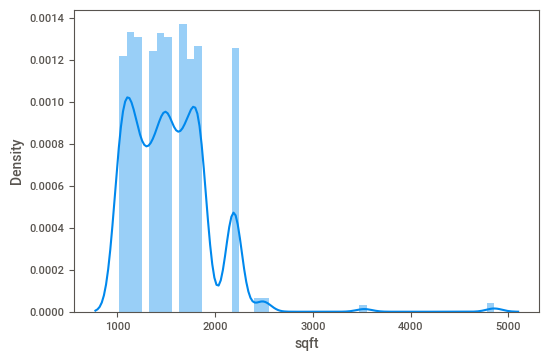

In [ ]:
## checking outliers in sqft
sns.distplot(df.sqft)

<AxesSubplot:xlabel='sqft'>

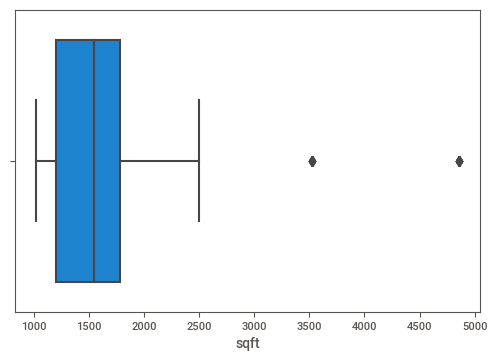

In [ ]:
## outlier visulaization
sns.boxplot(x=df.sqft)

## Using 3 standard deviation rule to detect the outliers.

In [ ]:
upper_limit = df.sqft.mean() + 3*df.sqft.std()
upper_limit

2786.9556759408288

In [ ]:
lower_limit = df.sqft.mean() -3*df.sqft.std()
lower_limit

289.3706097734573

In [ ]:
#df.loc[df['sqft'] < lower_limit] ## Less than lower limit
len(df.loc[df['sqft'] > upper_limit]) ## More than upper limit

20

In [ ]:
# Size of dataset
df.shape[0] # 3500
# size of data which are outliers
len(df.loc[df['sqft'] > upper_limit]) # 20
# percentage of data outliers
20/3500 *100
# If outlier percentage is greater than 5% than no treatment.

3500

In [ ]:
df.loc[df['sqft'] > upper_limit,'sqft']=df['sqft'].median()

<AxesSubplot:xlabel='sqft'>

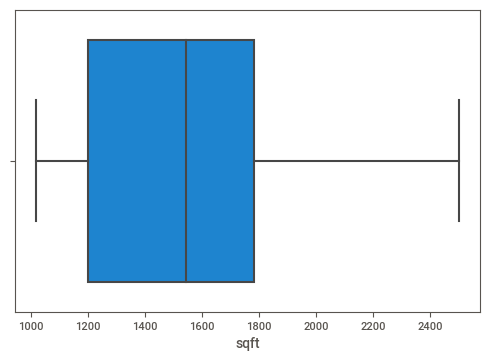

In [ ]:
import seaborn as sns
sns.boxplot(x=df.sqft)

<AxesSubplot:xlabel='yearsOld'>

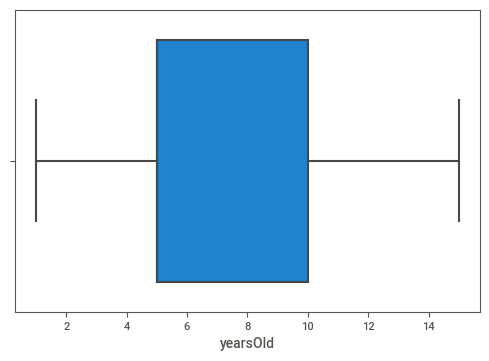

In [ ]:
####  Removing outliers from yearsOld
sns.boxplot(x=df.yearsOld)

<AxesSubplot:xlabel='floor'>

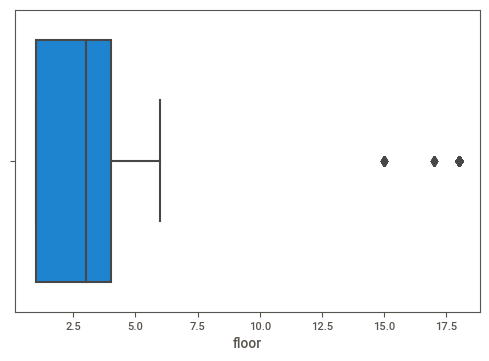

In [ ]:
### Removing outliers from floor

sns.boxplot(x=df.floor)

/Users/shubhangi/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='floor', ylabel='Density'>

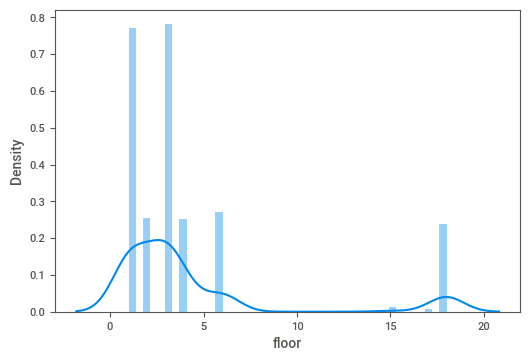

In [ ]:
## checking the distribution
sns.distplot(df.floor)

## IQR:-The interquartile range is a measure of where the “middle fifty” is in a data set. Where a range is a measure of where the beginning and end are in a set, an interquartile range is a measure of where the bulk of the values lie.

In [ ]:
# Interquartile range (IQR) 
from scipy import stats

IQR = stats.iqr(df.floor, interpolation = 'midpoint') 

IQR

3.0

In [ ]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df.floor.quantile(0.25)
# Third quartile (Q3) 
Q3 =df.floor.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [ ]:
min_limit

In [ ]:
## filetring the data
#df.loc[df['floor'] < min_limit]
df.loc[df['floor'] > max_limit]

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price
17,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000
38,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000
46,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000
51,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000
52,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000
...,...,...,...,...,...,...,...,...,...
3429,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000
3430,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000
3438,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000
3439,Subramanyapura,Super built-up Area,1784,Resale,5,18,18,18,7900000


In [ ]:
import numpy as np

In [ ]:
## imputing the outliers as the count is high
df.loc[df['floor'] > max_limit,'floor']=np.median(df.floor)

In [ ]:
df.floor.value_counts()

In [ ]:
df.loc[df['floor'] > max_limit]

,place,built,sqft,sale,yearsOld,floor,totalFloor,bhk,price


In [ ]:

sns.boxplot(x=df.yearsOld)

In [ ]:
sns.distplot(df.floor)

<AxesSubplot:xlabel='floor'>

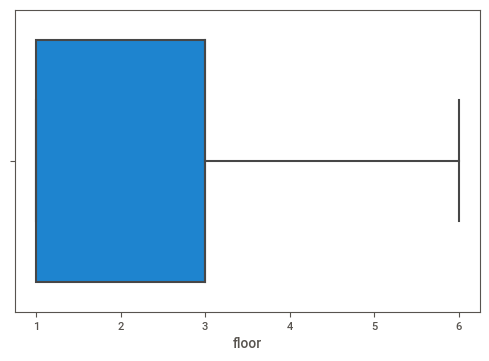

In [ ]:
sns.boxplot(x=df.floor)

In [ ]:
## Removing outliers from totalFloor
sns.distplot(df.totalFloor)

In [ ]:
sns.boxplot(df.totalFloor)

In [ ]:
## using IQR to remove the outliers
IQR = stats.iqr(df.totalFloor, interpolation = 'midpoint') 

IQR

In [ ]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df.totalFloor.quantile(0.25)
# Third quartile (Q3) 
Q3 =df.totalFloor.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [ ]:
max_limit

In [ ]:
##df.loc[df['totalFloor'] < min_limit]
df.loc[df['totalFloor'] > max_limit]

In [ ]:
## imputing the outliers as the count is high
df.loc[df['totalFloor'] > max_limit,'totalFloor']=np.median(df.totalFloor)

In [ ]:
sns.boxplot(df.totalFloor)

In [ ]:
### Checking outliers from bhk
sns.distplot(df.bhk)

In [ ]:
sns.boxplot(df.bhk)

In [ ]:
## using IQR to remove the outliers
IQR = stats.iqr(df.bhk, interpolation = 'midpoint') 

IQR

In [ ]:
## min and max limit calculation
# First quartile (Q1) 
Q1 = df.bhk.quantile(0.25)
# Third quartile (Q3) 
Q3 =df.bhk.quantile(0.75)
##getting the limits
min_limit=Q1 - 1.5*IQR

max_limit=Q3 +1.5*IQR

In [ ]:
##df.loc[df['bhk'] < min_limit]
df.loc[df['bhk'] > max_limit]

In [ ]:
## imputing the outliers as the count is high
df.loc[df['bhk'] > max_limit,'bhk']=np.median(df.bhk)